In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats import boxcox
from scipy.stats import norm
import seaborn as sns


In [62]:
def get_lead_time(purchase_quantity):
    threshold = 5
    if purchase_quantity<=threshold:
        return threshold
    return round(threshold+2*purchase_quantity/threshold)

def randomize_and_normalize(purchase_quantities, normalization_scale):
    # Apply Box-Cox transformation
    transformed_quantities, _ = boxcox(purchase_quantities)

    # Calculate mean and standard deviation of the transformed quantities
    mean_value = np.mean(transformed_quantities)
    standard_deviation = np.std(transformed_quantities)

    # Generate randomized quantities from a normal distribution
    randomized = np.random.normal(mean_value, standard_deviation, len(purchase_quantities))

    # Normalize quantities based on the first randomized value
    new_quantities = [round(quant * normalization_scale / randomized[0]) for quant in randomized]
    mean, std_dev = norm.fit(new_quantities)
    print("Estimated Mean:", mean)
    print("Estimated Standard Deviation:", std_dev)
    return new_quantities


df = pd.read_excel("./forcasting_data.xlsx",sheet_name="4. Ranked purchasing decisions")
df = df[['Name', 'Lead time, days', 'Purchase order qty', 'Demand probability, %']]
df = df[df["Name"]=="Keyboard"]
df["Purchase order qty"] = range(1,len(df)+1)
df["Purchase order qty"] = randomize_and_normalize(df["Purchase order qty"],20)
df["Lead time, days"] =df["Purchase order qty"].apply(lambda x:get_lead_time(x))
dates=pd.date_range(start='2020-01-01', end='2021-01-01')
df["Date"] = dates[:len(df)]
display(df)


Estimated Mean: 15.910891089108912
Estimated Standard Deviation: 7.7919722714616695


,Name,"Lead time, days",Purchase order qty,"Demand probability, %",Date
0,Keyboard,13,20,0.444182,2020-01-01
1,Keyboard,5,2,0.671463,2020-01-02
2,Keyboard,13,21,0.982032,2020-01-03
3,Keyboard,13,19,1.389544,2020-01-04
4,Keyboard,12,17,1.902227,2020-01-05
...,...,...,...,...,...
225,Keyboard,10,12,0.034269,2020-04-06
226,Keyboard,11,15,0.061115,2020-04-07
227,Keyboard,10,13,0.105448,2020-04-08
228,Keyboard,5,-4,0.176023,2020-04-09


In [33]:
#Read supply_chain_data
supply_chain_data_df = pd.read_csv("./supply_chain_data.csv")
supply_chain_data_df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


100


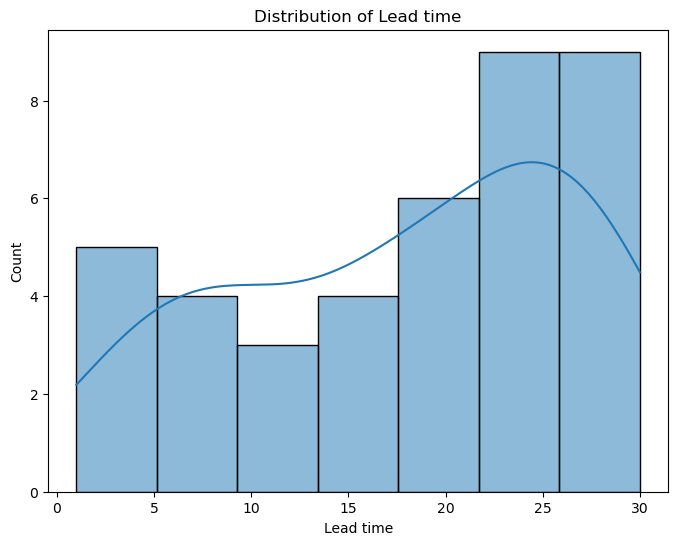

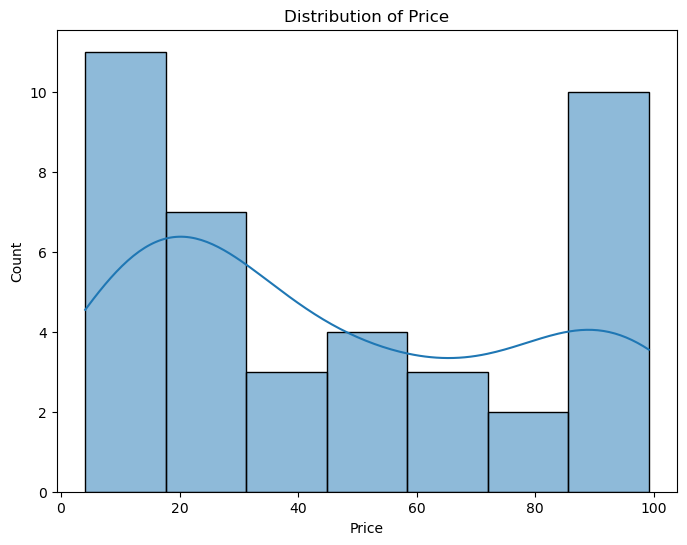

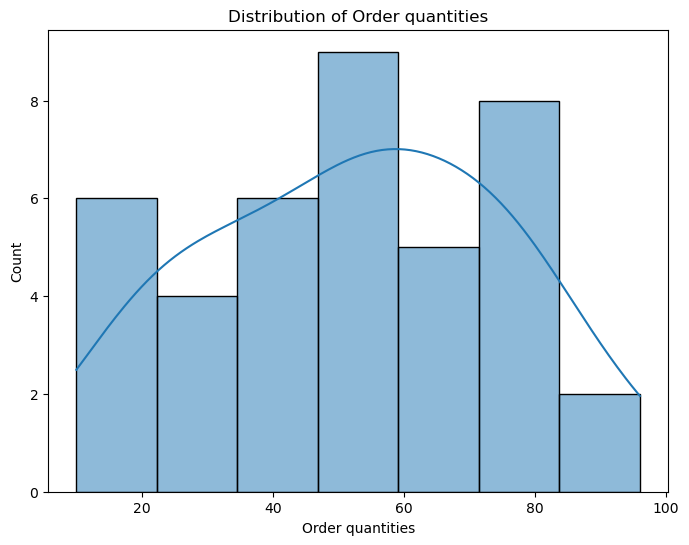

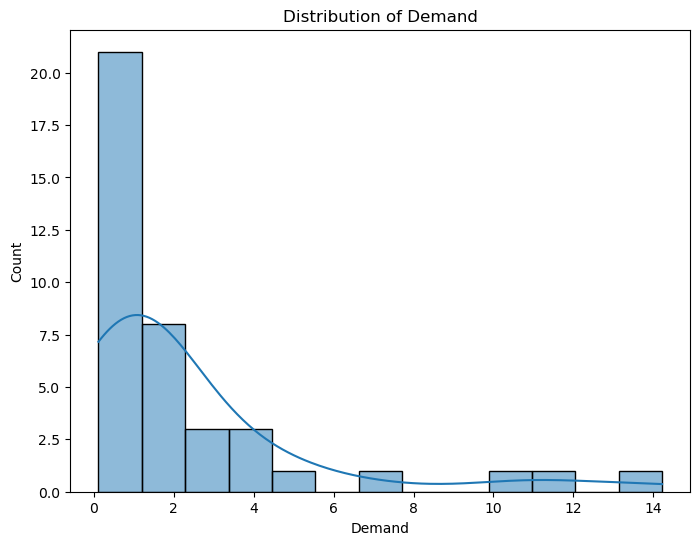

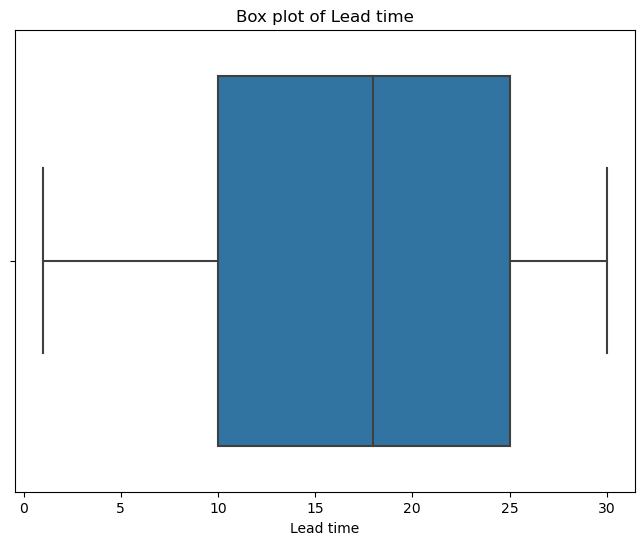

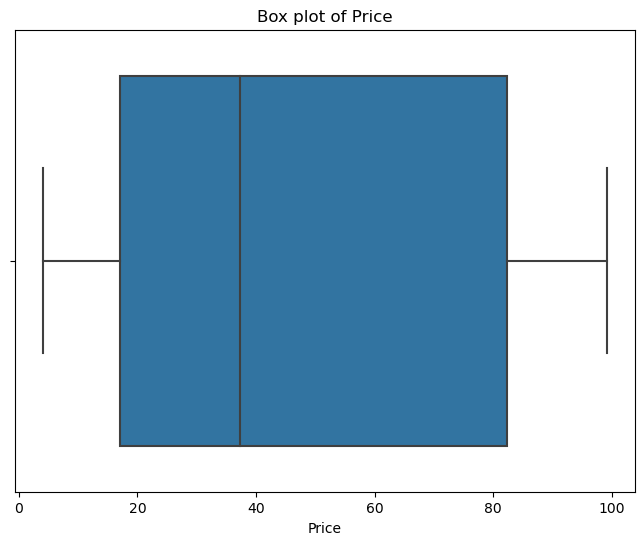

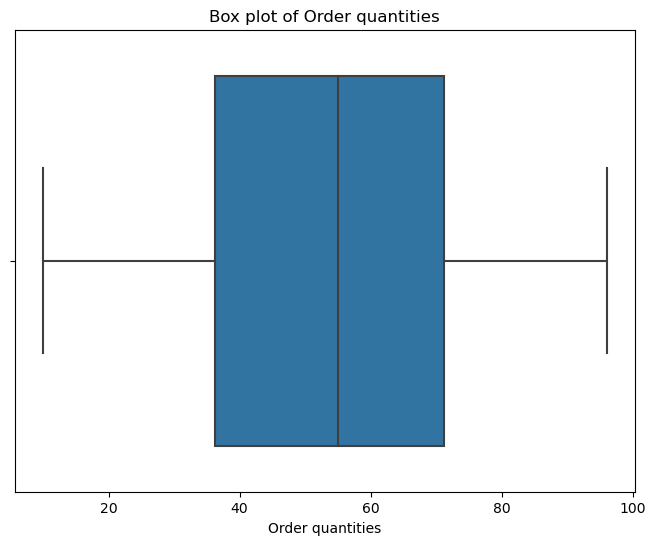

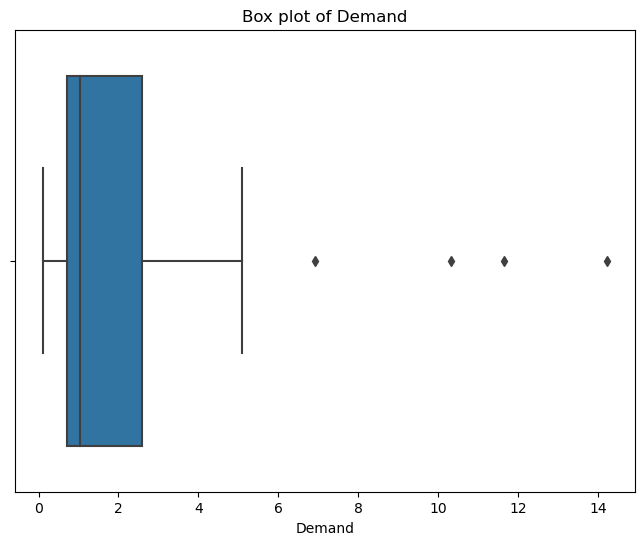

In [54]:
supply_chain_data_copy = supply_chain_data_df.copy()
print(len(supply_chain_data_copy))
supply_chain_data_groups = supply_chain_data_copy.groupby("Product type")
# Calculate the size of each group
group_sizes = supply_chain_data_groups.size()

# Find the product type with the largest group
largest_group_product_type = group_sizes.idxmax()
# Get the largest group's data
largest_group_data = supply_chain_data_copy[supply_chain_data_copy["Product type"] == largest_group_product_type].reset_index()
largest_group_data_filtered = largest_group_data[['Product type', 'Lead time', 'Price', 'Order quantities']]

# Create a copy of the subset
largest_group_data_filtered_copy = largest_group_data_filtered.copy()

# Calculate the demand and assign it to the copy
largest_group_data_filtered_copy["Demand"] = largest_group_data_filtered_copy["Order quantities"] / largest_group_data_filtered_copy["Price"]

# Histograms
for column in largest_group_data_filtered_copy.columns[1:]:
    plt.figure(figsize=(8, 6))
    sns.histplot(largest_group_data_filtered_copy[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()
#
# Box plots
for column in largest_group_data_filtered_copy.columns[1:]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=largest_group_data_filtered_copy[column])
    plt.title(f'Box plot of {column}')
    plt.show()


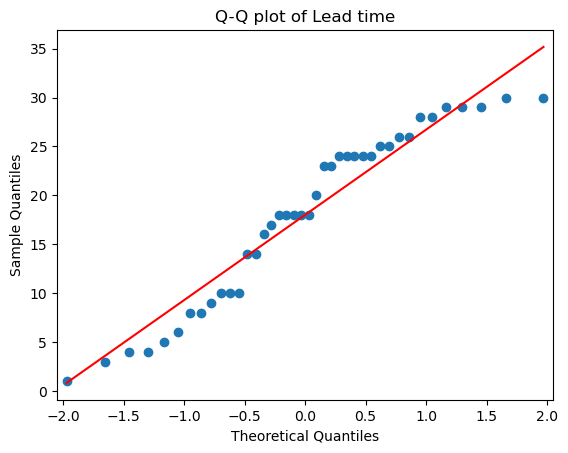

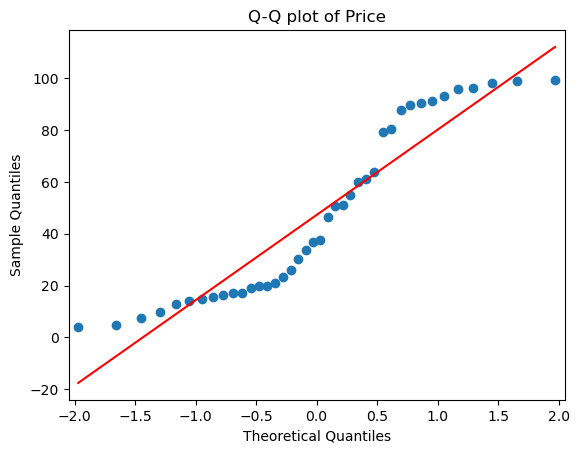

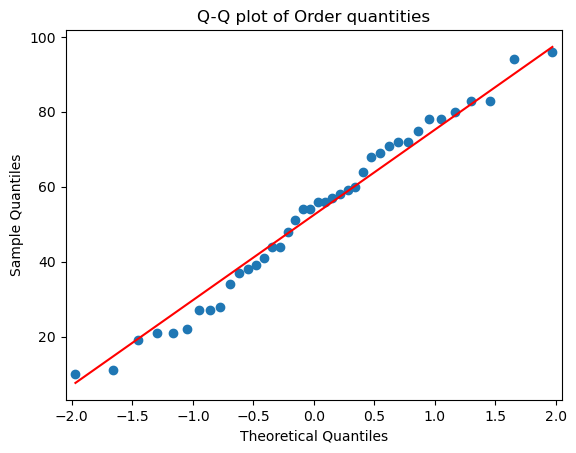

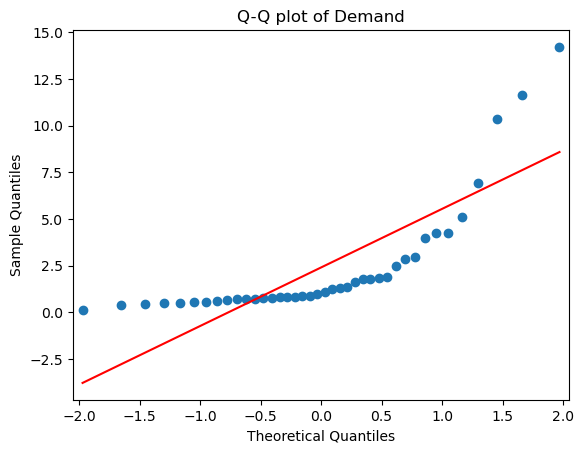

In [48]:
import statsmodels.api as sm

for column in largest_group_data_filtered_copy.columns[1:]:
    sm.qqplot(largest_group_data_filtered_copy[column], line='s')
    plt.title(f'Q-Q plot of {column}')
    plt.show()


In [52]:
from scipy.stats import shapiro

for column in largest_group_data_filtered_copy.columns[1:]:
    _, p_value = shapiro(largest_group_data_filtered_copy[column])
    print(f"Shapiro-Wilk test p-value for {column}: {p_value}")

    if p_value > 0.05:
        print(f"{column} appears to be normally distributed.")
    else:
        print(f"{column} does not appear to be normally distributed.")
    print("-" * 50)


Shapiro-Wilk test p-value for Lead time: 0.011271623894572258
Lead time does not appear to be normally distributed.
--------------------------------------------------
Shapiro-Wilk test p-value for Price: 0.00039519526762887836
Price does not appear to be normally distributed.
--------------------------------------------------
Shapiro-Wilk test p-value for Order quantities: 0.461272269487381
Order quantities appears to be normally distributed.
--------------------------------------------------
Shapiro-Wilk test p-value for Demand: 1.198830901216752e-08
Demand does not appear to be normally distributed.
--------------------------------------------------


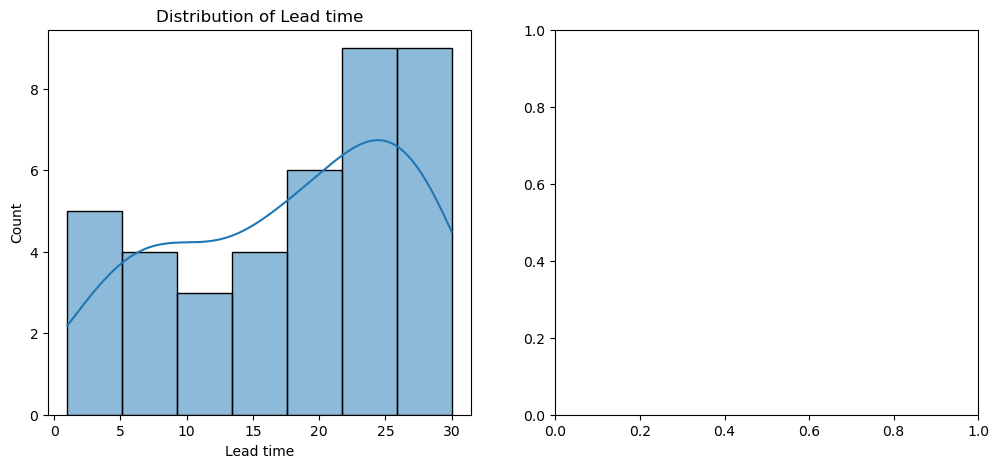

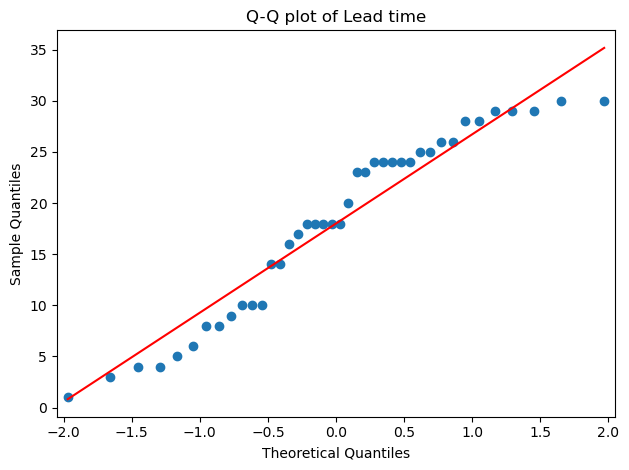

Shapiro-Wilk test p-value for Lead time: 0.0113
Skewness for Lead time: -0.3625
Kurtosis for Lead time: -1.1571
Lead time is left-skewed.
Lead time has negative kurtosis (platykurtic).
--------------------------------------------------


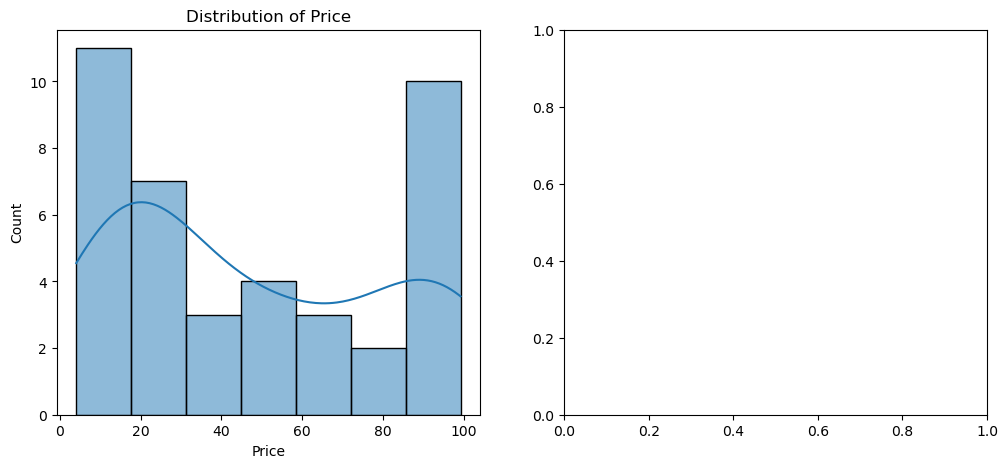

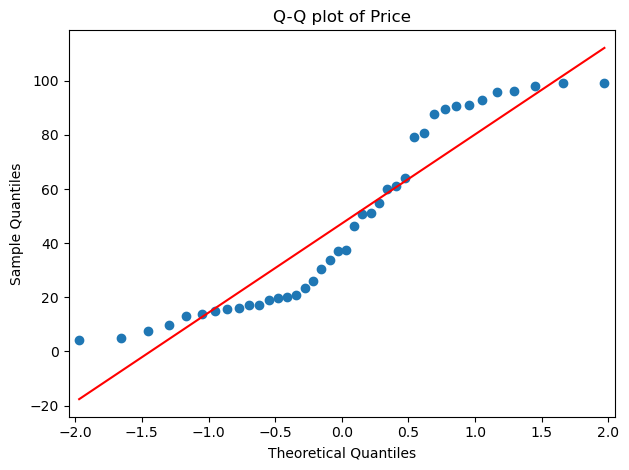

Shapiro-Wilk test p-value for Price: 0.0004
Skewness for Price: 0.3585
Kurtosis for Price: -1.4291
Price is right-skewed.
Price has negative kurtosis (platykurtic).
--------------------------------------------------


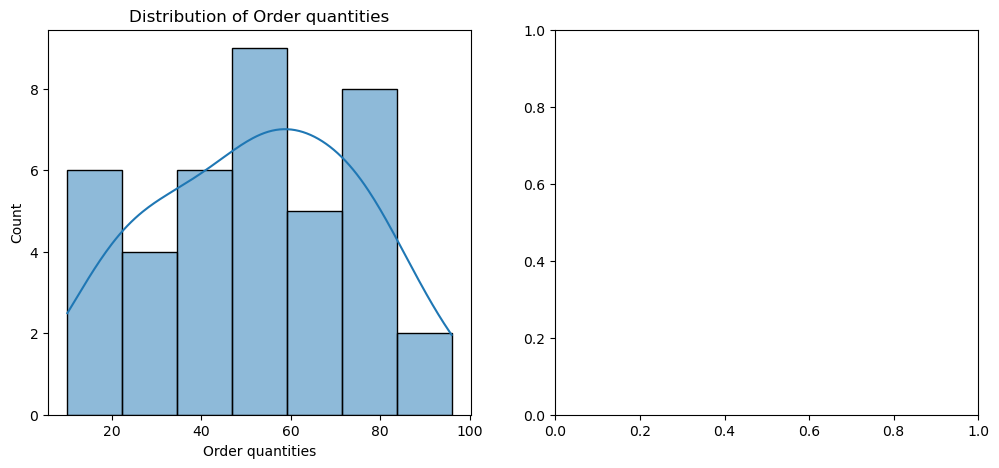

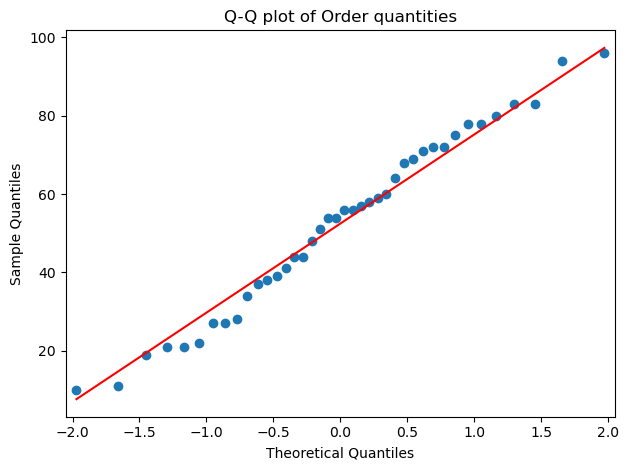

Shapiro-Wilk test p-value for Order quantities: 0.4613
Skewness for Order quantities: -0.0714
Kurtosis for Order quantities: -0.9173
Order quantities appears to be normally distributed.
--------------------------------------------------


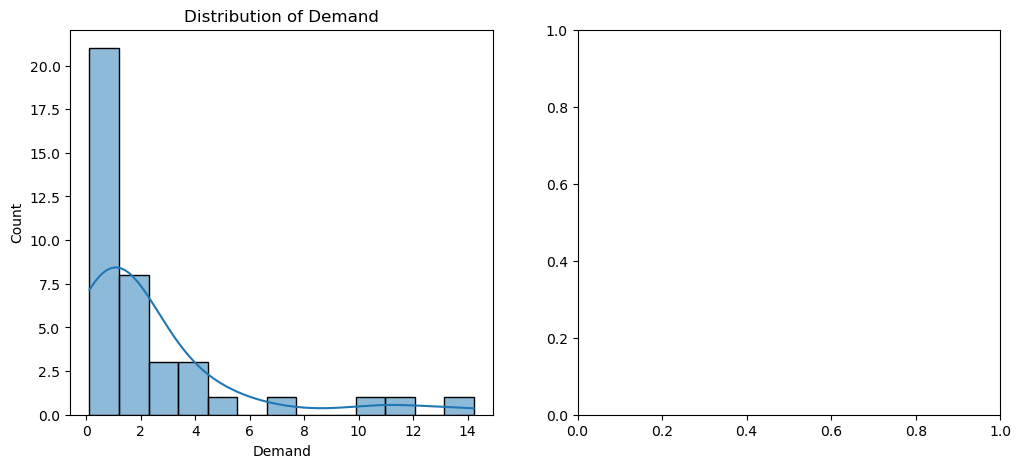

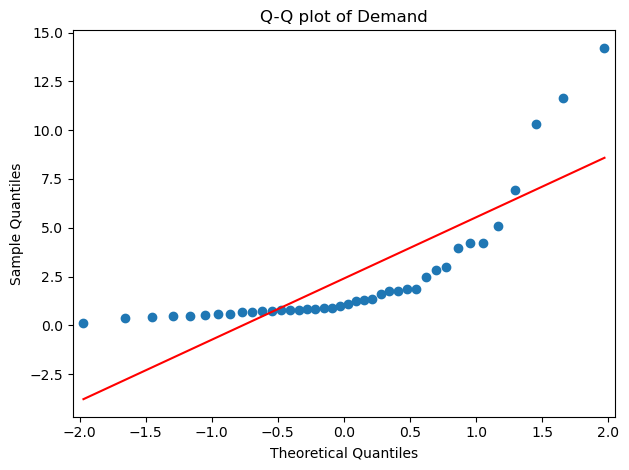

Shapiro-Wilk test p-value for Demand: 0.0000
Skewness for Demand: 2.3860
Kurtosis for Demand: 5.1094
Demand is right-skewed.
Demand has positive kurtosis (leptokurtic).
--------------------------------------------------


In [55]:
from scipy.stats import shapiro, skew, kurtosis

# Assuming largest_group_data_filtered_copy is your DataFrame

for column in largest_group_data_filtered_copy.columns[1:]:
    # Visualizations
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(largest_group_data_filtered_copy[column], kde=True)
    plt.title(f'Distribution of {column}')

    plt.subplot(1, 2, 2)
    sm.qqplot(largest_group_data_filtered_copy[column], line='s')
    plt.title(f'Q-Q plot of {column}')
    plt.tight_layout()
    plt.show()

    # Statistical Tests
    _, shapiro_p_value = shapiro(largest_group_data_filtered_copy[column])
    skew_value = skew(largest_group_data_filtered_copy[column])
    kurt_value = kurtosis(largest_group_data_filtered_copy[column])

    print(f"Shapiro-Wilk test p-value for {column}: {shapiro_p_value:.4f}")
    print(f"Skewness for {column}: {skew_value:.4f}")
    print(f"Kurtosis for {column}: {kurt_value:.4f}")

    # Interpretation
    if shapiro_p_value > 0.05:
        print(f"{column} appears to be normally distributed.")
    else:
        if skew_value > 0:
            print(f"{column} is right-skewed.")
        elif skew_value < 0:
            print(f"{column} is left-skewed.")
        else:
            print(f"{column} has an unknown skewness.")

        if kurt_value > 0:
            print(f"{column} has positive kurtosis (leptokurtic).")
        elif kurt_value < 0:
            print(f"{column} has negative kurtosis (platykurtic).")
        else:
            print(f"{column} has mesokurtic kurtosis (similar to a normal distribution).")

    print("-" * 50)
